# Benchmark Code for Convolutional Neural Networks  
Accuracy and running time of Convolutional Neural Networks with Max-Pooling layers will be benchmarked here.  

## The Data  
CIFAR-10 dataset is used and is downloaded using the Keras library.  

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
print Y_train.shape
print Y_test.shape

(50000, 3, 32, 32)
(10000, 3, 32, 32)
(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## The Model  
We use a 'typical' CNN with Max-Pooling layers to predict classes in CIFAR-10 dataset.  

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.
Couldn't import dot_parser, loading of dot files will not be possible.

Using gpu device 0: GeForce GTX 770 (CNMeM is disabled)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Optionally, install [Hualos](https://github.com/fchollet/hualos) and use it to visualize the loss function live.  

In [6]:
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')

### Define the model

In [73]:
model = Sequential()
model.add(Convolution2D(10, 5, 5, activation='relu', input_shape=(3,32,32)))  # Layer 1
model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 2
model.add(MaxPooling2D())  # Layer 3
model.add(Dropout(0.5))  # Layer 4
model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 5
model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 6
model.add(MaxPooling2D())  # Layer 7
model.add(Dropout(0.5))  # Layer 8

model.add(Flatten())  # Layer 9

model.add(Dense(256, activation='relu'))  # Layer 10
model.add(Dropout(0.5))  # Layer 11
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd')

### Train  the model
Run Time: `model.fit` takes 20 seconds per epoch on NVidia GeForce GTX 770 GPU on an computer with an Intel i7 processor.

In [74]:
model.fit(X_train, Y_train, nb_epoch=20, batch_size=32, verbose=1, show_accuracy=True, callbacks=[remote])

Epoch 1/20
50000/50000 [==============================] - 22s - loss: 2.2375 - acc: 0.1584    
Epoch 2/20
50000/50000 [==============================] - 22s - loss: 2.0602 - acc: 0.2049    
Epoch 3/20
50000/50000 [==============================] - 22s - loss: 1.9716 - acc: 0.2234    
Epoch 4/20
50000/50000 [==============================] - 22s - loss: 1.9060 - acc: 0.2514    
Epoch 5/20
50000/50000 [==============================] - 22s - loss: 1.8483 - acc: 0.2799    
Epoch 6/20
50000/50000 [==============================] - 22s - loss: 1.8047 - acc: 0.2996    
Epoch 7/20
50000/50000 [==============================] - 22s - loss: 1.7747 - acc: 0.3121    
Epoch 8/20
50000/50000 [==============================] - 22s - loss: 1.7488 - acc: 0.3242    
Epoch 9/20
50000/50000 [==============================] - 22s - loss: 1.7239 - acc: 0.3376    
Epoch 10/20
50000/50000 [==============================] - 22s - loss: 1.7008 - acc: 0.3529    
Epoch 11/20
50000/50000 [========================

### Save the model  [optional]
Reference: http://keras.io/faq/#how-can-i-save-a-keras-model

In [103]:
import utils
reload(utils)

<module 'utils' from 'utils.py'>

In [104]:
utils.save_model(model, 'model')

True

## The Layers  
In order to visualize the trained layers:  
1. Recreate the CNN model up until the layer you want to visualize.  
2. Copy weights from the trained model to the new model.  
3. Then use `predict` to transform an input image to the output at the desired layer.  
4. Plot the output image.  

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

### Load the model [optional]  

In [107]:
import utils
reload(utils)

<module 'utils' from 'utils.py'>

In [106]:
model = load_model('model')

### Test Image

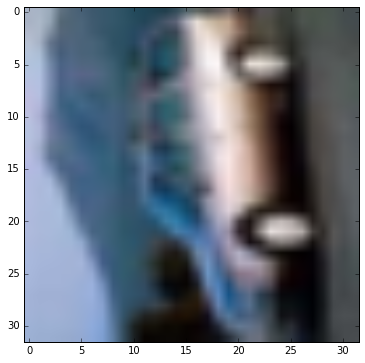

In [59]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[4].T)

### Layer 1
`model.add(Convolution2D(10, 5, 5, activation='relu', input_shape=(3,32,32)))  # Layer 1`


Image dimensions: (5, 10, 28, 28)


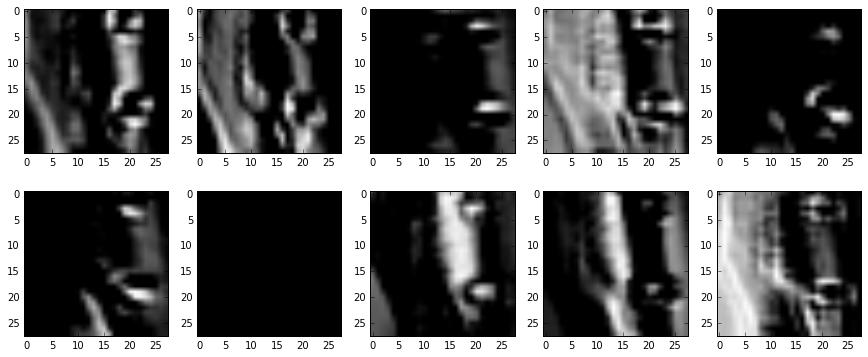

In [120]:
layer_num = 1
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 2
`model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 2`

Image dimensions: (5, 10, 24, 24)


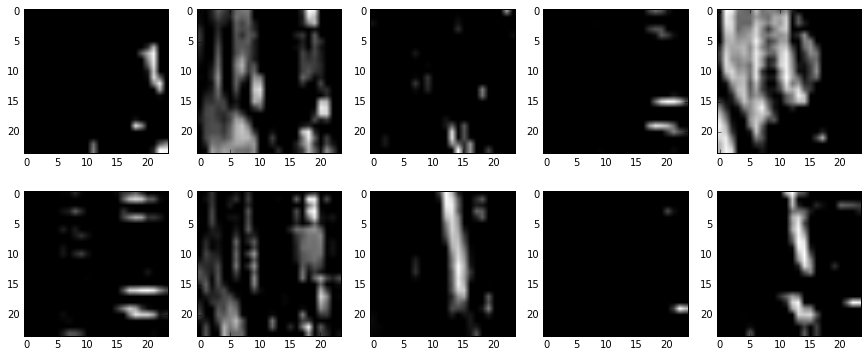

In [121]:
layer_num = 2
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 3
`model.add(MaxPooling2D())  # Layer 3`

Image dimensions: (5, 10, 12, 12)


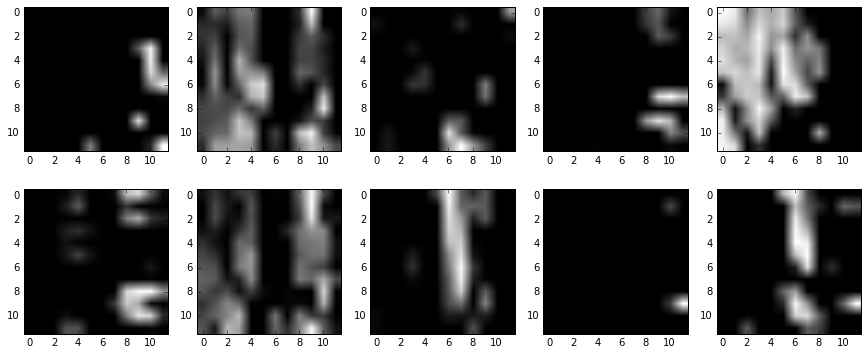

In [122]:
layer_num = 3
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 4
`model.add(Dropout(0.5))  # Layer 4`

Image dimensions: (5, 10, 12, 12)


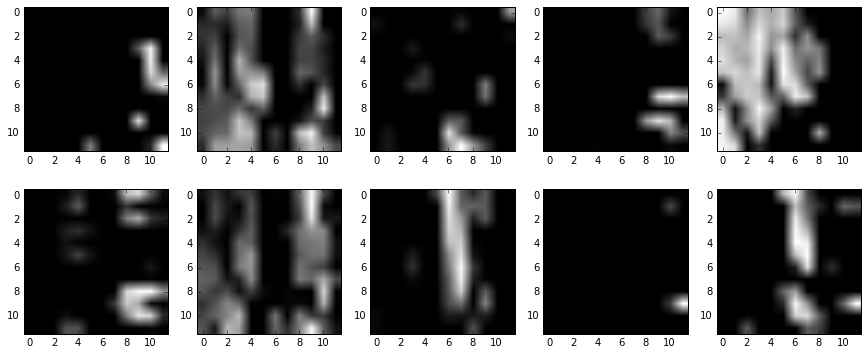

In [123]:
layer_num = 4
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 5
`model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 5`

Image dimensions: (5, 10, 12, 12)


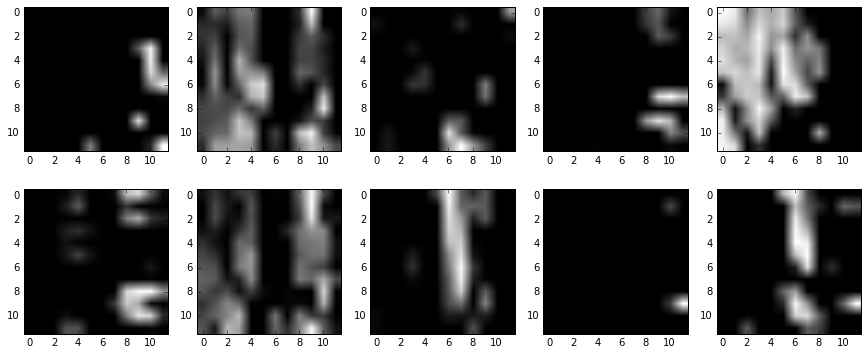

In [124]:
layer_num = 5
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 6
`model.add(Convolution2D(10, 5, 5, activation='relu'))  # Layer 6`

Image dimensions: (5, 10, 12, 12)


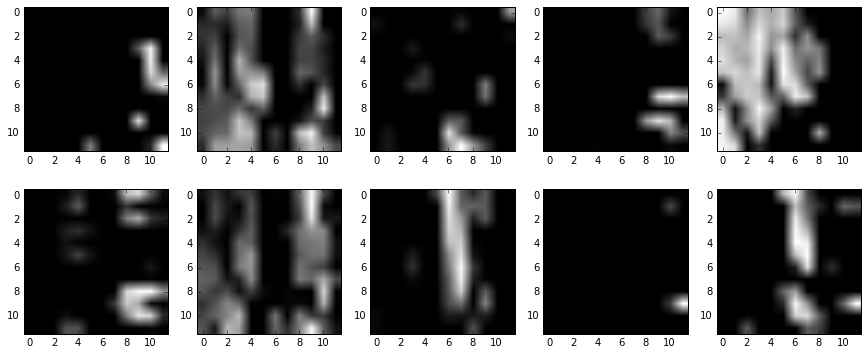

In [125]:
layer_num = 6
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 7
`model.add(MaxPooling2D())  # Layer 7`

Image dimensions: (5, 10, 12, 12)


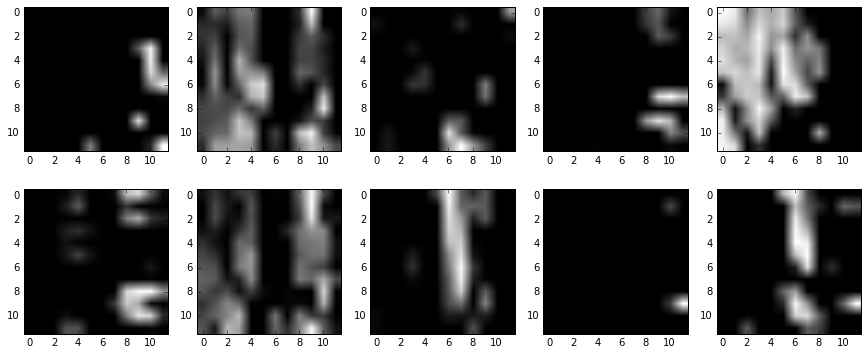

In [126]:
layer_num = 7
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)

### Layer 8
`model.add(Dropout(0.5))  # Layer 8`

Image dimensions: (5, 10, 12, 12)


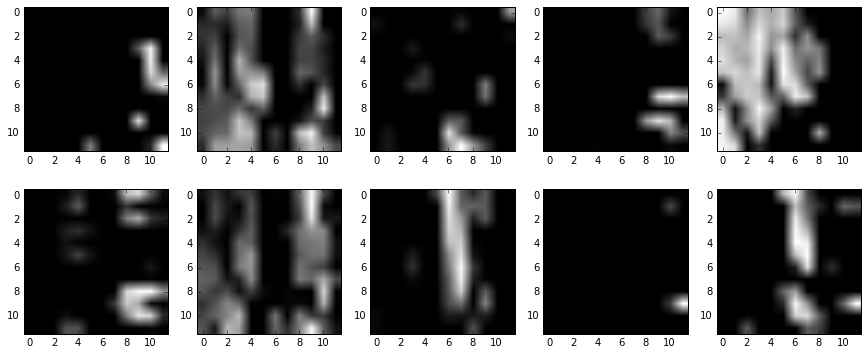

In [127]:
layer_num = 8
model = load_model('model')
out = utils.output_at_layer(X_train[:5], model, layer_num)
print "Image dimensions: " + str(out.shape)

plt.figure(figsize=(15,6))
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)